<h1 align="center"> <span style="font-size: 20px;"> Proyecto Final Grupo Nº 7 </span> <br>
    <align="center"> <span style="font-size: 15px;">  Proyecto Yelp & Google Maps - Reviewa y Recomendaciones</span><br>         
<align="center"> <span style="font-size: 15px;">@utores:  Javier Castro, Luca Ramallo, Luis Ramírez, Lesmen García.</span> <br>
  <a href="https://github.com/lesmengp/Proyecto-Final-Grupo-07.git">GitHub: <span style="font-size: 20px;">Proyecto Yelp & Google Maps</span></a> 
</h1>

# Modelo de ML con Regresión Logística.

### Target = Promedios de Estrellas

### Librerías a Utilizar:

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os
import io
import json
import gcsfs
import ast
from textblob import TextBlob   #0.17.1
import pandas as pd
import folium
import webbrowser
import textwrap
from folium.plugins import MarkerCluster

In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

### Cargando Dataset Consolidado Final para ML: 'Consolidado_Businees_Review_Tip.parquet'

In [3]:
### Cargando DataSets Consolidado para Análisis de ML: 'Consolidado_Businees_Review_Tip.parquet'
# Ruta completa en Cloud Storage
#ruta_eda_datalike = "gs://gmy/Datasets_ML/df_ML_promedios_Final.parquet"
ruta_eda_datalike = "gs://gmy/Datasets_ML/NuevosDatasetsML/Consolidado_Businees_Review_Tip.parquet"

# Lee el archivo Parquet directamente en un DataFrame de pandas
df_ML = pd.read_parquet(ruta_eda_datalike, storage_options={"project": "Proyecto Final - Henry"})
df_ML


,business_id,name,address,city,state,latitude,longitude,stars,review_count,Categorias,...,T_S_P_Review,T_S_Neutros_Review,T_S_N_Review,Total_useful,Total_funny,Total_cool,Total_Sentimientos_Tip,T_S_P_Tip,T_S_Neutros_Tip,T_S_N_Tip
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,39.955505,-75.155564,4.0,80,Restaurants,...,82,0,5,131,47,95,10,0,0,0
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,40.338183,-75.471659,4.5,13,Food,...,12,0,1,2,0,0,1,0,0,0
2,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,AZ,36.269593,-87.058943,2.0,6,Food,...,3,1,2,0,0,0,2,0,0,0
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,MO,36.208102,-86.768170,1.5,10,Restaurants,...,7,0,3,2,2,0,2,0,0,0
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,MO,27.955269,-82.456320,4.0,10,Restaurants,...,10,0,1,29,5,17,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44631,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,1181 N Milwaukee St,Boise,ID,43.615401,-116.284689,4.0,33,Restaurants,...,29,1,4,34,14,18,9,0,0,0
44632,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,11177 N Oracle Rd,Oro Valley,PA,32.409552,-110.943073,4.5,41,Food,...,41,0,2,86,5,20,36,0,0,0
44633,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,MO,39.935982,-75.158665,4.5,35,Restaurants,...,34,0,1,24,9,9,4,0,0,0
44634,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,PA,39.856185,-75.427725,4.5,14,Restaurants,...,12,0,2,21,5,15,1,0,0,0


In [4]:
df = df_ML.copy()

In [5]:
df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'latitude',
       'longitude', 'stars', 'review_count', 'Categorias', 'SubCategorias',
       'RestaurantsTakeOut', 'BusinessAcceptsCreditCards',
       'RestaurantsDelivery', 'OutdoorSeating', 'BikeParking',
       'RestaurantsReservations', 'WiFi', 'HasTV', 'GoodForKids',
       'RestaurantsGoodForGroups', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday', 'Total_UnaEstrella',
       'Total_DosEstrellas', 'Total_TresEstrellas', 'Total_CuatroEstrellas',
       'Total_CincoEstrellas', 'Total_Estrellas', 'Total_Sentimientos_Reviews',
       'T_S_P_Review', 'T_S_Neutros_Review', 'T_S_N_Review', 'Total_useful',
       'Total_funny', 'Total_cool', 'Total_Sentimientos_Tip', 'T_S_P_Tip',
       'T_S_Neutros_Tip', 'T_S_N_Tip'],
      dtype='object')

In [6]:
Columnas_Modelo_RLogistica = ['name', 'city', 'state', 
                 'stars', 'review_count', 'Categorias', 'SubCategorias',
                 'Total_Estrellas', 'Total_CincoEstrellas' , 
                 'T_S_P_Review',
                 'Total_useful', 'Total_funny', 'Total_cool', 
                 'T_S_P_Tip',
                 'latitude', 'longitude']
Columnas_Modelo_RLogistica

['name',
 'city',
 'state',
 'stars',
 'review_count',
 'Categorias',
 'SubCategorias',
 'Total_Estrellas',
 'Total_CincoEstrellas',
 'T_S_P_Review',
 'Total_useful',
 'Total_funny',
 'Total_cool',
 'T_S_P_Tip',
 'latitude',
 'longitude']

In [8]:
df_Modelo_ML = df[Columnas_Modelo_RLogistica]

In [9]:
filtro_categorias_Restaurants = df_Modelo_ML[(df_Modelo_ML['Categorias'] == 'Restaurants') | (df['Categorias'] == 'Food')]


In [10]:
filtro_categorias_Restaurants.shape

(42692, 16)

In [11]:
filtro_categorias_Restaurants.isna().sum()

name                    0
city                    0
state                   0
stars                   0
review_count            0
Categorias              0
SubCategorias           0
Total_Estrellas         0
Total_CincoEstrellas    0
T_S_P_Review            0
Total_useful            0
Total_funny             0
Total_cool              0
T_S_P_Tip               0
latitude                0
longitude               0
dtype: int64

In [12]:
filtro_categorias_Restaurants.shape

(42692, 16)

In [14]:
### Normalizando Columna de estrellas 'stars'
# Crea una nueva columna 'binario' con valores 1 si 'valor' es mayor o igual a 4, de lo contrario, 0
filtro_categorias_Restaurants['stars_Target'] = filtro_categorias_Restaurants['stars'].apply(lambda x: 1 if x >= 4 else 0)

filtro_categorias_Restaurants[['stars','stars_Target']]

/var/tmp/ipykernel_104404/3456828581.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_categorias_Restaurants['stars_Target'] = filtro_categorias_Restaurants['stars'].apply(lambda x: 1 if x >= 4 else 0)


,stars,stars_Target
0,4.0,1
1,4.5,1
2,2.0,0
3,1.5,0
4,4.0,1
...,...,...
44631,4.0,1
44632,4.5,1
44633,4.5,1
44634,4.5,1


In [15]:
filtro_categorias_Restaurants.columns

Index(['name', 'city', 'state', 'stars', 'review_count', 'Categorias',
       'SubCategorias', 'Total_Estrellas', 'Total_CincoEstrellas',
       'T_S_P_Review', 'Total_useful', 'Total_funny', 'Total_cool',
       'T_S_P_Tip', 'latitude', 'longitude', 'stars_Target'],
      dtype='object')

In [19]:
ColumnasModelo_ML = [
    'review_count',
    'Total_Estrellas',
    'Total_CincoEstrellas',
    'T_S_P_Review',
    'Total_useful',
    'Total_funny',
    'Total_cool',
    'T_S_P_Tip']

In [21]:
### Defenimos las variables 'X' nuestro modelo
X = np.asarray(filtro_categorias_Restaurants[ColumnasModelo_ML])


In [22]:
y = np.asarray(filtro_categorias_Restaurants['stars_Target'])

In [23]:
### Normalizando el Dataset del Modelo de ML
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)

In [24]:
## Train/Test dataset
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [25]:
### Modeling (Logistic Regression with Scikit-learn)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
#LR

# Crear un modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
# Predeciendo con el conjunto de prueba
y_pred = model.predict(X_test)

In [27]:
### ### jaccard index
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_pred, pos_label=0)

0.8431450808221912

In [28]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo de regresión logística:", accuracy)

Precisión del modelo de regresión logística: 0.9079517507904907


In [29]:
### confusion matrix

from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[3528  543]
 [ 243 4225]]


Confusion matrix, without normalization
[[3528  543]
 [ 243 4225]]


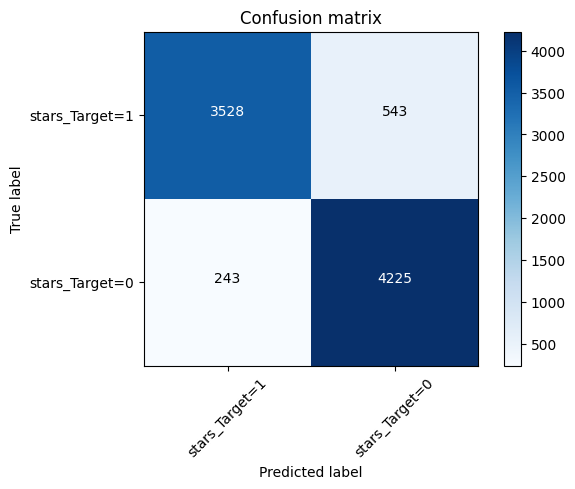

In [30]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['stars_Target=1','stars_Target=0'],normalize= False,  title='Confusion matrix')

In [31]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.91      4468
           1       0.94      0.87      0.90      4071

    accuracy                           0.91      8539
   macro avg       0.91      0.91      0.91      8539
weighted avg       0.91      0.91      0.91      8539



In [32]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Obtener los valores individuales de la matriz de confusión
TP = conf_matrix[1, 1]  # Verdaderos positivos
TN = conf_matrix[0, 0]  # Verdaderos negativos
FP = conf_matrix[0, 1]  # Falsos positivos
FN = conf_matrix[1, 0]  # Falsos negativos

print("Número de casos que se clasificaron correctamente como positivos = ", TP)
print("Número de casos que se clasificaron correctamente como negativos = ", TN)
print("Número de casos que se clasificaron incorrectamente como positivos\n   cuando en realidad son negativos = ", FP)
print("Número de casos que se clasificaron incorrectamente como negativos\n   cuando en realidad son positivos = ", FN)

Número de casos que se clasificaron correctamente como positivos =  3528
Número de casos que se clasificaron correctamente como negativos =  4225
Número de casos que se clasificaron incorrectamente como positivos
   cuando en realidad son negativos =  243
Número de casos que se clasificaron incorrectamente como negativos
   cuando en realidad son positivos =  543


### FIN

In [41]:
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

### Predecir en el Nuevos Datos
### Cargando los Datos

nuevos_datos = pd.DataFrame({    
    'review_count': [67],
    'Total_Estrellas': [2300],
    'Total_CincoEstrellas': [0],
    'T_S_P_Review': [2600],
    'Total_useful': [450],
    'Total_funny': [100],
    'Total_cool': [126],
    'T_S_P_Tip': [1000]
})


# Realizar la predicción en los datos editados
prediccion_datos_nuevos = model.predict(nuevos_datos)
print("Predicción Nuevos Datos = ", prediccion_datos_nuevos)


Predicción Nuevos Datos =  [1]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
